In [93]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from transforms3d.euler import euler2mat

In [94]:
def inverse_kinematics(x: float, y: float, z: float, a1: float, a2: float):
    y_prime = -math.sqrt((z)**2 + y**2)
    thetaz = math.atan2(abs(y), z)

    c2 = (x**2 + y_prime**2 - a1**2 - a2**2) / (2 * a1 * a2)
    s2 = math.sqrt(abs(1 - c2**2))
    theta2 = math.atan2(s2, c2)

    c1 = (x * (a1 + (a2 * c2)) + y_prime * (a2 * s2)) / (x**2 + y_prime**2)
    s1 = (y_prime * (a1 + (a2 * c2)) - x * (a2 * s2)) / (x**2 + y_prime**2)
    theta1 = math.atan2(s1, c1)

    theta_shoulder = -theta1
    theta_elbow = theta_shoulder - theta2
    theta_hip = thetaz

    return math.degrees(theta_shoulder), math.degrees(theta_elbow), math.degrees(theta_hip)

In [95]:
# 設定機器狗的參數
body_length = 20  # 前後腿間距 (X 軸)
body_width = 15   # 左右腿間距 (Z 軸)
leg_upper_length = 10  # 大腿長度 (Y 軸)
leg_lower_length = 10  # 小腿長度 (Y 軸)
stand_height = 15  # 站立高度 (肩部到地面)

# 機器狗的肩部位置 (X, Z, Y)
shoulder_positions = np.array([
    [-body_length / 2, -body_length / 2, body_length / 2, body_length / 2],
    [-body_width / 2, body_width / 2, -body_width / 2, body_width / 2],
    [0, 0, 0, 0],
])

# 計算膝部和腳端位置（使用逆向運動學）
knee_positions = np.zeros_like(shoulder_positions)
foot_positions = np.zeros_like(shoulder_positions)

for i in range(4):
    x, z, y = shoulder_positions[:,i]
    theta_shoulder, theta_elbow, theta_hip = inverse_kinematics(0, -stand_height, 0, leg_upper_length, leg_lower_length)
    print("theta: ", theta_shoulder, theta_elbow, theta_hip)

    knee_x = x + leg_upper_length * math.cos(math.radians(theta_shoulder))
    knee_y = y - leg_upper_length * math.sin(math.radians(theta_shoulder))
    knee_z = z + leg_upper_length * math.sin(math.radians(90 - theta_hip))
    foot_x = knee_x + leg_lower_length * math.cos(math.radians(theta_elbow))
    foot_y = knee_y - leg_lower_length * math.sin(math.radians(theta_elbow))
    foot_z = knee_z + leg_lower_length * math.sin(math.radians(90 - theta_hip))
    print("x: ", x, "knee_x: ", knee_x, "foot_x: ", foot_x)
    print("y: ", y, "knee_y: ", knee_y, "foot_y: ", foot_y)
    print("z: ", z, "knee_z: ", knee_z, "foot_z: ", foot_z)
    knee_positions[:,i] = [knee_x, knee_z, knee_y]
    
    foot_positions[:,i] = [foot_x, foot_z, foot_y]

theta:  131.40962210927086 48.59037789072913 90.0
x:  -10.0 knee_x:  -16.614378277661476 foot_x:  -9.999999999999996
y:  0.0 knee_y:  -7.500000000000001 foot_y:  -15.0
z:  -7.5 knee_z:  -7.5 foot_z:  -7.5
theta:  131.40962210927086 48.59037789072913 90.0
x:  -10.0 knee_x:  -16.614378277661476 foot_x:  -9.999999999999996
y:  0.0 knee_y:  -7.500000000000001 foot_y:  -15.0
z:  7.5 knee_z:  7.5 foot_z:  7.5
theta:  131.40962210927086 48.59037789072913 90.0
x:  10.0 knee_x:  3.3856217223385245 foot_x:  10.000000000000004
y:  0.0 knee_y:  -7.500000000000001 foot_y:  -15.0
z:  -7.5 knee_z:  -7.5 foot_z:  -7.5
theta:  131.40962210927086 48.59037789072913 90.0
x:  10.0 knee_x:  3.3856217223385245 foot_x:  10.000000000000004
y:  0.0 knee_y:  -7.500000000000001 foot_y:  -15.0
z:  7.5 knee_z:  7.5 foot_z:  7.5


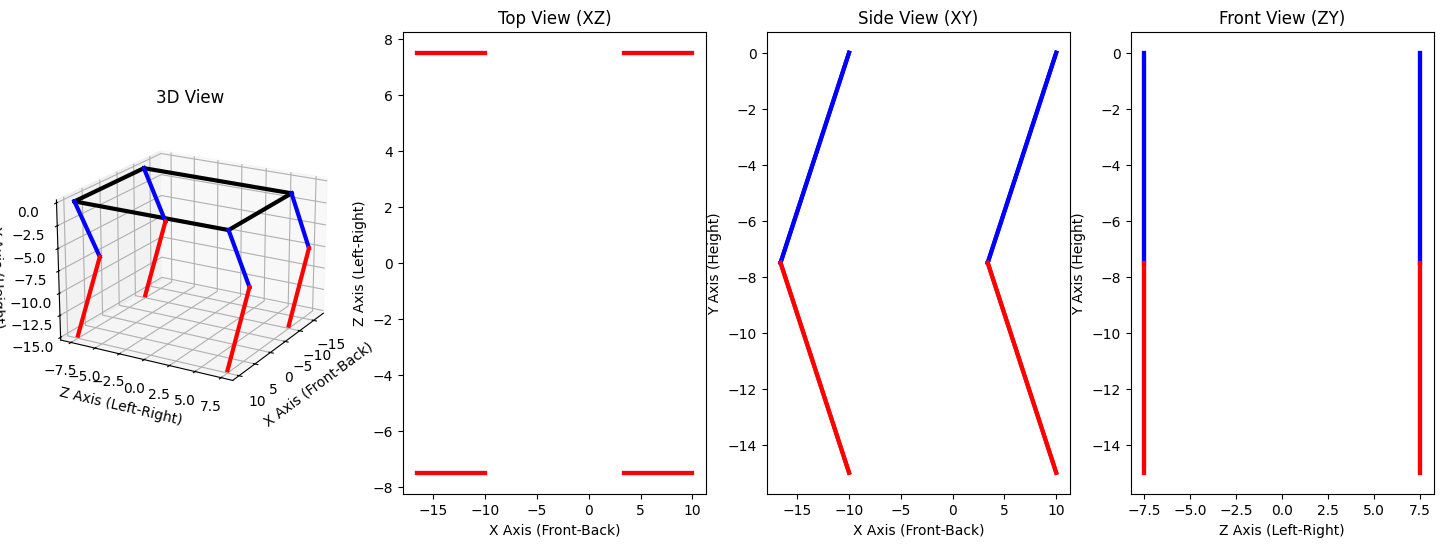

In [96]:
# 繪製 3D 及 3 個 2D 視角的機器狗模型
fig = plt.figure(figsize=(18, 6))

# 3D 視圖
ax3d = fig.add_subplot(141, projection='3d')
ax3d.set_title("3D View")
ax3d.set_xlabel("X Axis (Front-Back)")
ax3d.set_ylabel("Z Axis (Left-Right)")
ax3d.set_zlabel("Y Axis (Height)")
ax3d.view_init(elev=20, azim=30)

# XZ 平面 (正視圖)
ax_xz = fig.add_subplot(142)
ax_xz.set_title("Top View (XZ)")
ax_xz.set_xlabel("X Axis (Front-Back)")
ax_xz.set_ylabel("Z Axis (Left-Right)")

# XY 平面 (側視圖)
ax_xy = fig.add_subplot(143)
ax_xy.set_title("Side View (XY)")
ax_xy.set_xlabel("X Axis (Front-Back)")
ax_xy.set_ylabel("Y Axis (Height)")

# ZY 平面 (俯視圖)
ax_zy = fig.add_subplot(144)
ax_zy.set_title("Front View (ZY)")
ax_zy.set_xlabel("Z Axis (Left-Right)")
ax_zy.set_ylabel("Y Axis (Height)")

# 繪製 3D 身體
body_lines = [
    (shoulder_positions[:, 0], shoulder_positions[:, 1]),
    (shoulder_positions[:, 2], shoulder_positions[:, 3]),
    (shoulder_positions[:, 0], shoulder_positions[:, 2]),
    (shoulder_positions[:, 1], shoulder_positions[:, 3]),
]

for line in body_lines:
    ax3d.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], [line[0][2], line[1][2]], 'k-', lw=3)

# 繪製 3D 腿部
for i in range(4):
    ax3d.plot(
        [shoulder_positions[0, i], knee_positions[0, i]],
        [shoulder_positions[1, i], knee_positions[1, i]],
        [shoulder_positions[2, i], knee_positions[2, i]],
        'b-', lw=3)  # 大腿

    ax3d.plot(
        [knee_positions[0, i], foot_positions[0, i]],
        [knee_positions[1, i], foot_positions[1, i]],
        [knee_positions[2, i], foot_positions[2, i]],
        'r-', lw=3)  # 小腿

# 繪製 XZ 平面
for i in range(4):
    ax_xz.plot([shoulder_positions[0, i], knee_positions[0, i]], [shoulder_positions[1, i], knee_positions[1, i]], 'b-', lw=3)  # 大腿
    ax_xz.plot([knee_positions[0, i], foot_positions[0, i]], [knee_positions[1, i], foot_positions[1, i]], 'r-', lw=3)  # 小腿

# 繪製 XY 平面
for i in range(4):
    ax_xy.plot([shoulder_positions[0, i], knee_positions[0, i]], [shoulder_positions[2, i], knee_positions[2, i]], 'b-', lw=3)  # 大腿
    ax_xy.plot([knee_positions[0, i], foot_positions[0, i]], [knee_positions[2, i], foot_positions[2, i]], 'r-', lw=3)  # 小腿

# 繪製 ZY 平面
for i in range(4):
    ax_zy.plot([shoulder_positions[1, i], knee_positions[1, i]], [shoulder_positions[2, i], knee_positions[2, i]], 'b-', lw=3)  # 大腿
    ax_zy.plot([knee_positions[1, i], foot_positions[1, i]], [knee_positions[2, i], foot_positions[2, i]], 'r-', lw=3)  # 小腿

plt.show()


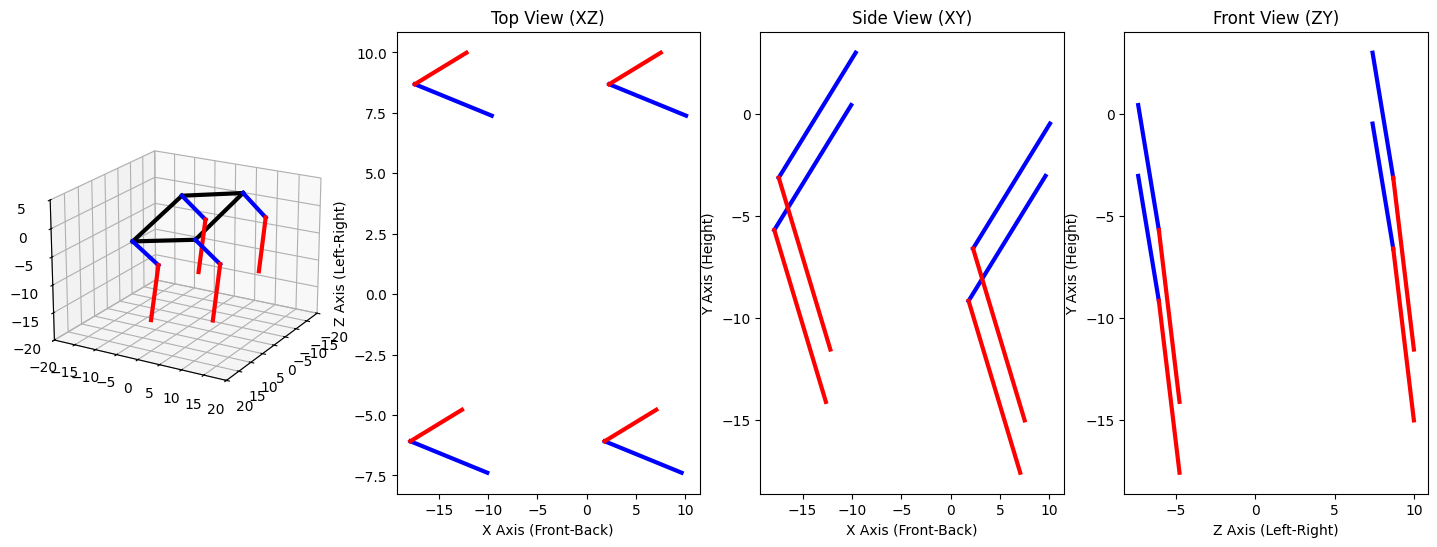

In [97]:
R = euler2mat(math.radians(10),math.radians(10),0)
gyro_shoulder_positions = R @ shoulder_positions
gyro_body_lines = [
    (gyro_shoulder_positions[:, 0], gyro_shoulder_positions[:, 1]),
    (gyro_shoulder_positions[:, 2], gyro_shoulder_positions[:, 3]),
    (gyro_shoulder_positions[:, 0], gyro_shoulder_positions[:, 2]),
    (gyro_shoulder_positions[:, 1], gyro_shoulder_positions[:, 3]),
]

gyro_knee_positions = R @ knee_positions
gyro_foot_positions = R @ foot_positions

fig = plt.figure(figsize=(18, 6))
gyro_ax3d = fig.add_subplot(141, projection='3d')
gyro_ax3d.set_xlim(-20,20)
gyro_ax3d.xaxis.set_major_locator(MultipleLocator(5))
gyro_ax3d.set_ylim(-20,20)
gyro_ax3d.yaxis.set_major_locator(MultipleLocator(5))
gyro_ax3d.set_zlim(-20,5)
gyro_ax3d.view_init(elev=20, azim=30)

# XZ 平面 (正視圖)
gyro_ax_xz = fig.add_subplot(142)
gyro_ax_xz.set_title("Top View (XZ)")
gyro_ax_xz.set_xlabel("X Axis (Front-Back)")
gyro_ax_xz.set_ylabel("Z Axis (Left-Right)")

# XY 平面 (側視圖)
gyro_ax_xy = fig.add_subplot(143)
gyro_ax_xy.set_title("Side View (XY)")
gyro_ax_xy.set_xlabel("X Axis (Front-Back)")
gyro_ax_xy.set_ylabel("Y Axis (Height)")

# ZY 平面 (俯視圖)
gyro_ax_zy = fig.add_subplot(144)
gyro_ax_zy.set_title("Front View (ZY)")
gyro_ax_zy.set_xlabel("Z Axis (Left-Right)")
gyro_ax_zy.set_ylabel("Y Axis (Height)")

for line in gyro_body_lines:
    gyro_ax3d.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], [line[0][2], line[1][2]], 'k-', lw=3)

for i in range(4):
    gyro_ax3d.plot(
        [gyro_shoulder_positions[0, i], gyro_knee_positions[0, i]],
        [gyro_shoulder_positions[1, i], gyro_knee_positions[1, i]],
        [gyro_shoulder_positions[2, i], gyro_knee_positions[2, i]],
        'b-', lw=3)  # 大腿

    gyro_ax3d.plot(
        [gyro_knee_positions[0, i], gyro_foot_positions[0, i]],
        [gyro_knee_positions[1, i], gyro_foot_positions[1, i]],
        [gyro_knee_positions[2, i], gyro_foot_positions[2, i]],
        'r-', lw=3)  # 小腿
    
# 繪製 XZ 平面
for i in range(4):
    gyro_ax_xz.plot([gyro_shoulder_positions[0, i], gyro_knee_positions[0, i]], [gyro_shoulder_positions[1, i], gyro_knee_positions[1, i]], 'b-', lw=3)  # 大腿
    gyro_ax_xz.plot([gyro_knee_positions[0, i], gyro_foot_positions[0, i]], [gyro_knee_positions[1, i], gyro_foot_positions[1, i]], 'r-', lw=3)  # 小腿

# 繪製 XY 平面
for i in range(4):
    gyro_ax_xy.plot([gyro_shoulder_positions[0, i], gyro_knee_positions[0, i]], [gyro_shoulder_positions[2, i], gyro_knee_positions[2, i]], 'b-', lw=3)  # 大腿
    gyro_ax_xy.plot([gyro_knee_positions[0, i], gyro_foot_positions[0, i]], [gyro_knee_positions[2, i], gyro_foot_positions[2, i]], 'r-', lw=3)  # 小腿

# 繪製 ZY 平面
for i in range(4):
    gyro_ax_zy.plot([gyro_shoulder_positions[1, i], gyro_knee_positions[1, i]], [gyro_shoulder_positions[2, i], gyro_knee_positions[2, i]], 'b-', lw=3)  # 大腿
    gyro_ax_zy.plot([gyro_knee_positions[1, i], gyro_foot_positions[1, i]], [gyro_knee_positions[2, i], gyro_foot_positions[2, i]], 'r-', lw=3)  # 小腿

plt.show()

In [98]:
def get_plane_from_points(p1: np.ndarray, p2: np.ndarray, p3: np.ndarray):
    v1 = np.array(p2) - np.array(p1)
    v2 = np.array(p3) - np.array(p1)

    # 計算法向量（叉積）
    normal = np.cross(v1, v2)
    A, B, C = normal

    # 計算 D
    D = -(A * p1[0] + B * p1[1] + C * p1[2])

    return A,B,C,D

In [99]:
def turn_points_with_euler_radians(points: np.ndarray, roll, pitch, yaw):
    if points.shape[0] != 3:
        raise ValueError("input points must have 3 dimension (x, z, y)")

    rotation_matrix = euler2mat(roll, pitch, yaw)

    # rotate
    rotated_points = rotation_matrix @ points
    return rotated_points

In [100]:
from enum import IntEnum
from dataclasses import dataclass

class LegPosition(IntEnum):
    FL = 0  # Front Left
    FR = 1  # Front Right
    BL = 2  # Back Left
    BR = 3  # Back Right

@dataclass
class GyroData():
    roll: float = 0.0
    pitch: float = 0.0
    yaw: float = 0.0

In [101]:
def compenstated_with_gyro_data(x: float, y: float, z: float, leg_position: LegPosition, gyro_data):
    if gyro_data == None:
        print("No Gyro Data!")
        return x, y, z
    gyro_shoulder_positions = turn_points_with_euler_radians(shoulder_positions, math.radians(gyro_data.roll), math.radians(gyro_data.pitch), 0)
    A, B, C, D = get_plane_from_points(gyro_shoulder_positions[:,0], gyro_shoulder_positions[:,1], gyro_shoulder_positions[:,2])
    compensation_height = -(A*gyro_shoulder_positions[0,leg_position] + B*gyro_shoulder_positions[1,leg_position]+D)/C
    y += compensation_height
    return x, y, z

In [110]:
def get_angle_from_position(x: float, y: float, z: float, leg_position: LegPosition=None, gyro_data: GyroData=None):
    if gyro_data != None:
        x, y, z = compenstated_with_gyro_data(x, y, z, leg_position, gyro_data)
    return inverse_kinematics(x,y,z,leg_upper_length,leg_lower_length)

In [ ]:
gyro_data = GyroData(roll=10, pitch=10, yaw=0)
angle1 = get_angle_from_position(0, -15, 0)
angle2 = get_angle_from_position(0, -15, 0, LegPosition.FL, gyro_data)

In [109]:
gyro_data = GyroData(roll=10, pitch=10, yaw=0)
points = compenstated_with_gyro_data(0, -15, 0, LegPosition.FR, gyro_data)
points

(0, np.float64(-11.98094268585944), 0)

In [102]:
compensated_foot_positions = foot_positions.copy()
gyro_data = GyroData(roll=10, pitch=10, yaw=0)

for i in range(4):
    x, y, z = compenstated_with_gyro_data(x=compensated_foot_positions[0,i], y=compensated_foot_positions[2,i], z=compensated_foot_positions[1,i], leg_position=i, gyro_data=gyro_data)
    compensated_foot_positions[:,i] = np.asfortranarray([x, z, y])


compensated_foot_positions

array([[-10.        , -10.        ,  10.        ,  10.        ],
       [ -7.5       ,   7.5       ,  -7.5       ,   7.5       ],
       [-14.54609376, -11.98094269, -18.01905731, -15.45390624]])

In [103]:
compensated_shoulder_positions = shoulder_positions.copy()
compensated_knee_positions = np.zeros_like(compensated_shoulder_positions)

for i in range(4):
    x, z, y = compensated_shoulder_positions[:,i]
    print(compensated_foot_positions[2,i])
    theta_shoulder, theta_elbow, theta_hip = inverse_kinematics(0, compensated_foot_positions[2,i], 0, leg_upper_length, leg_lower_length)
    print("theta: ", theta_shoulder, theta_elbow, theta_hip)

    compensated_knee_x = x + leg_upper_length * math.cos(math.radians(theta_shoulder))
    compensated_knee_y = y - leg_upper_length * math.sin(math.radians(theta_shoulder))
    compensated_knee_z = z + leg_upper_length * math.sin(math.radians(90 - theta_hip))
    compensated_foot_x = compensated_knee_x + leg_lower_length * math.cos(math.radians(theta_elbow))
    compensated_foot_y = compensated_knee_y - leg_lower_length * math.sin(math.radians(theta_elbow))
    compensated_foot_z = compensated_knee_z + leg_lower_length * math.sin(math.radians(90 - theta_hip))
    print("x: ", x, "knee_x: ", compensated_knee_x, "foot_x: ", compensated_foot_x)
    print("y: ", y, "knee_y: ", compensated_knee_y, "foot_y: ", compensated_foot_y)
    print("z: ", z, "knee_z: ", compensated_knee_z, "foot_z: ", compensated_foot_z)
    compensated_knee_positions[:,i] = [compensated_knee_x, compensated_knee_z, compensated_knee_y]
    
    compensated_foot_positions[:,i] = [compensated_foot_x, compensated_foot_z, compensated_foot_y]

-14.546093760801954
theta:  133.33909010449005 46.660909895509995 90.0
x:  -10.0 knee_x:  -16.863147169884215 foot_x:  -10.000000000000009
y:  0.0 knee_y:  -7.273046880400972 foot_y:  -14.54609376080195
z:  -7.5 knee_z:  -7.5 foot_z:  -7.5
-11.98094268585944
theta:  143.19831589520894 36.801684104791065 90.0
x:  -10.0 knee_x:  -18.007137633982435 foot_x:  -10.000000000000002
y:  0.0 knee_y:  -5.990471342929719 foot_y:  -11.98094268585944
z:  7.5 knee_z:  7.5 foot_z:  7.5
-18.01905731414056
theta:  115.71639877608173 64.28360122391827 90.0
x:  10.0 knee_x:  5.660830335487055 foot_x:  10.0
y:  0.0 knee_y:  -9.00952865707028 foot_y:  -18.01905731414056
z:  -7.5 knee_z:  -7.5 foot_z:  -7.5
-15.453906239198046
theta:  129.4034536612559 50.5965463387441 90.0
x:  10.0 knee_x:  3.6522290930186427 foot_x:  10.0
y:  0.0 knee_y:  -7.726953119599024 foot_y:  -15.453906239198046
z:  7.5 knee_z:  7.5 foot_z:  7.5


In [104]:
A, B, C, D = get_plane_from_points(gyro_shoulder_positions[:,0], gyro_shoulder_positions[:,1], gyro_shoulder_positions[:,2])
calculated_A, calculated_B, calculated_C, calculated_D = get_plane_from_points(compensated_foot_positions[:,0], compensated_foot_positions[:,1], compensated_foot_positions[:,2])

print("Original: A=", A, ", B=", B, ", C=", C, ", D=", D)
print("Calculated: A=", calculated_A, ", B=", calculated_B, ", C=", calculated_C, ", D=", calculated_D)

Original: A= -51.303021498850306 , B= 52.094453300079095 , C= -290.95389311788625 , D= 2.842170943040401e-14
Calculated: A= -52.09445330007916 , B= 51.30302149885026 , C= -300.0000000000001 , D= -4500.000000000002


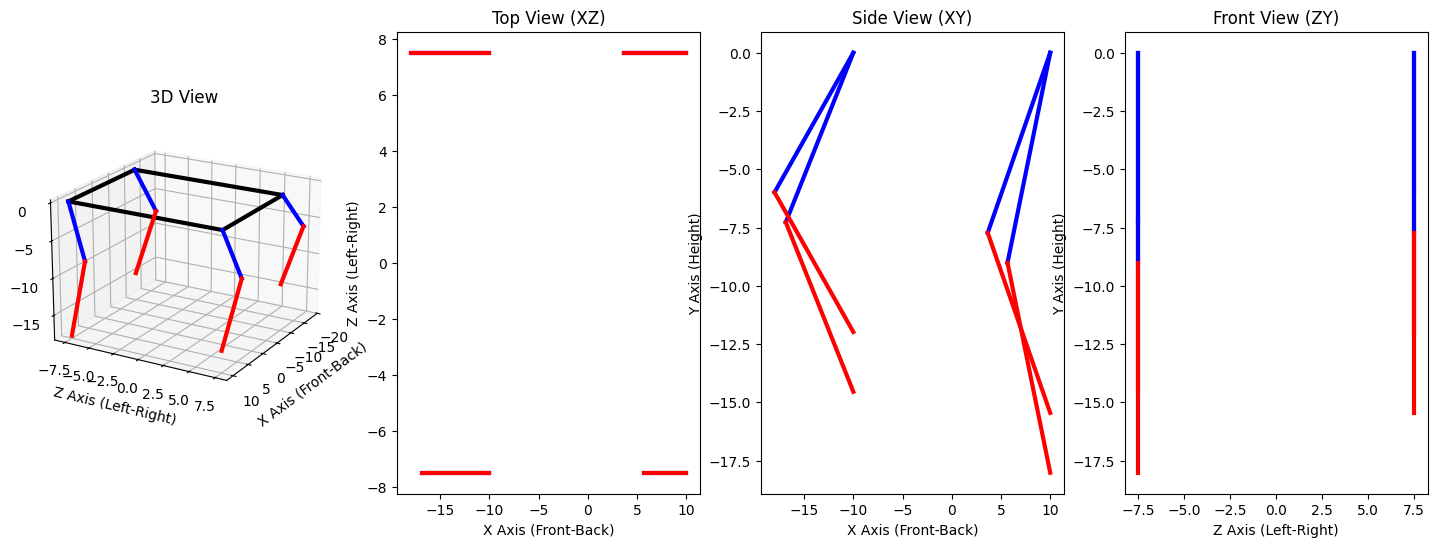

In [105]:
# 繪製 3D 及 3 個 2D 視角的機器狗模型
fig = plt.figure(figsize=(18, 6))

# 3D 視圖
comp_ax3d = fig.add_subplot(141, projection='3d')
comp_ax3d.set_title("3D View")
comp_ax3d.set_xlabel("X Axis (Front-Back)")
comp_ax3d.set_ylabel("Z Axis (Left-Right)")
comp_ax3d.set_zlabel("Y Axis (Height)")
comp_ax3d.view_init(elev=20, azim=30)

# XZ 平面 (正視圖)
comp_ax_xz = fig.add_subplot(142)
comp_ax_xz.set_title("Top View (XZ)")
comp_ax_xz.set_xlabel("X Axis (Front-Back)")
comp_ax_xz.set_ylabel("Z Axis (Left-Right)")

# XY 平面 (側視圖)
comp_ax_xy = fig.add_subplot(143)
comp_ax_xy.set_title("Side View (XY)")
comp_ax_xy.set_xlabel("X Axis (Front-Back)")
comp_ax_xy.set_ylabel("Y Axis (Height)")

# ZY 平面 (俯視圖)
comp_ax_zy = fig.add_subplot(144)
comp_ax_zy.set_title("Front View (ZY)")
comp_ax_zy.set_xlabel("Z Axis (Left-Right)")
comp_ax_zy.set_ylabel("Y Axis (Height)")

# 繪製 3D 身體
comp_body_lines = [
    (compensated_shoulder_positions[:, 0], compensated_shoulder_positions[:, 1]),
    (compensated_shoulder_positions[:, 2], compensated_shoulder_positions[:, 3]),
    (compensated_shoulder_positions[:, 0], compensated_shoulder_positions[:, 2]),
    (compensated_shoulder_positions[:, 1], compensated_shoulder_positions[:, 3]),
]

for line in comp_body_lines:
    comp_ax3d.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], [line[0][2], line[1][2]], 'k-', lw=3)

# 繪製 3D 腿部
for i in range(4):
    comp_ax3d.plot(
        [compensated_shoulder_positions[0, i], compensated_knee_positions[0, i]],
        [compensated_shoulder_positions[1, i], compensated_knee_positions[1, i]],
        [compensated_shoulder_positions[2, i], compensated_knee_positions[2, i]],
        'b-', lw=3)  # 大腿

    comp_ax3d.plot(
        [compensated_knee_positions[0, i], compensated_foot_positions[0, i]],
        [compensated_knee_positions[1, i], compensated_foot_positions[1, i]],
        [compensated_knee_positions[2, i], compensated_foot_positions[2, i]],
        'r-', lw=3)  # 小腿

# 繪製 XZ 平面
for i in range(4):
    comp_ax_xz.plot([compensated_shoulder_positions[0, i], compensated_knee_positions[0, i]], [compensated_shoulder_positions[1, i], compensated_knee_positions[1, i]], 'b-', lw=3)  # 大腿
    comp_ax_xz.plot([compensated_knee_positions[0, i], compensated_foot_positions[0, i]], [compensated_knee_positions[1, i], compensated_foot_positions[1, i]], 'r-', lw=3)  # 小腿

# 繪製 XY 平面
for i in range(4):
    comp_ax_xy.plot([compensated_shoulder_positions[0, i], compensated_knee_positions[0, i]], [compensated_shoulder_positions[2, i], compensated_knee_positions[2, i]], 'b-', lw=3)  # 大腿
    comp_ax_xy.plot([compensated_knee_positions[0, i], compensated_foot_positions[0, i]], [compensated_knee_positions[2, i], compensated_foot_positions[2, i]], 'r-', lw=3)  # 小腿

# 繪製 ZY 平面
for i in range(4):
    comp_ax_zy.plot([compensated_shoulder_positions[1, i], compensated_knee_positions[1, i]], [compensated_shoulder_positions[2, i], compensated_knee_positions[2, i]], 'b-', lw=3)  # 大腿
    comp_ax_zy.plot([compensated_knee_positions[1, i], compensated_foot_positions[1, i]], [compensated_knee_positions[2, i], compensated_foot_positions[2, i]], 'r-', lw=3)  # 小腿

plt.show()
